<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression---Plot-Ridge-coefficients-as-a-function-of-the-regularization" data-toc-modified-id="Ridge-Regression---Plot-Ridge-coefficients-as-a-function-of-the-regularization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ridge Regression - Plot Ridge coefficients as a function of the regularization</a></span></li></ul></li></ul></div>

__File Info:__

Date: 20181030

Author: Stephanie Langeland 

File Name: 08_ridge_regression_sklearn.ipynb

Version: 01

Previous Version/File: None

Dependencies: None

Purpose: Ridge regression using scikit-learn.

Input File(s): None

Output File(s): None

Required by: 
- A beginner's guide to Python.
- Tutorial: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py

Status: Complete

Machine: Dell Latitude - Windows 10

Python Version: Python 3

# Data Prep

In [1]:
## Import packages:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
bos = pd.DataFrame(
    boston.data,
    columns = boston.feature_names
)

bos["PRICE"] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
## X Variable dataframe:
bos_X = bos.drop(
    "PRICE",
    axis = 1
)


## training and testing data:

X_train, X_test, Y_train, Y_test = train_test_split(
    bos_X,
    bos.PRICE,
    test_size = 0.33, ## randomly select 33% of the data 
    random_state = 5 ## equivalent is set.seed in R
)

print(
    "X_train dimensions: ",
    X_train.shape,
    "\n",
    "X_test dimensions: ",
    X_test.shape,
    "\n",
    "Y_train dimensions: ",
    Y_train.shape,
    "\n",
    "Y_test dimensions: ",
    Y_test.shape
)

X_train dimensions:  (339, 13) 
 X_test dimensions:  (167, 13) 
 Y_train dimensions:  (339,) 
 Y_test dimensions:  (167,)


# Ridge Regression

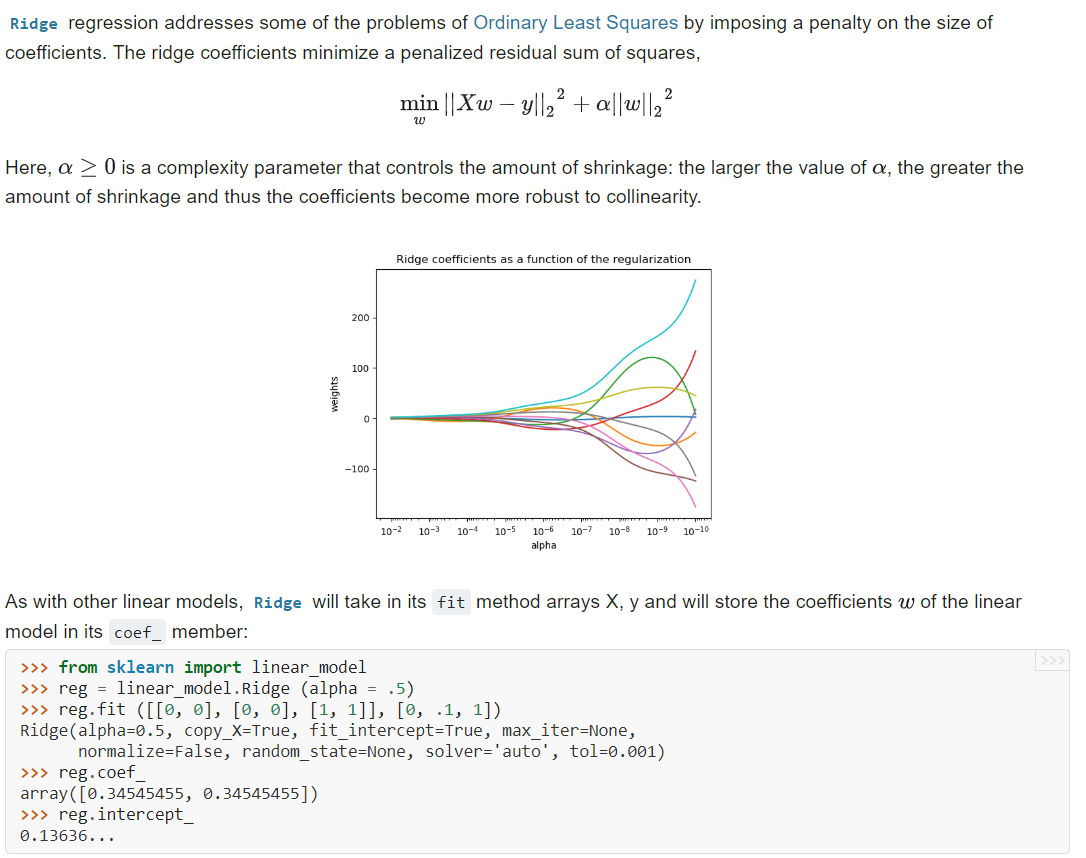

## Ridge Regression - Plot Ridge coefficients as a function of the regularization

In [5]:
## Compute the regularization paths:
n_alphas = 200

alphas = np.logspace( ## Return numbers spaced evenly on a log scale.
    -10, ## start
    -2, ## stop
    num = n_alphas ## number os samples to generate
)


coefs = [] ## create empty list

for a in alphas:
    ridge = linear_model.Ridge(
        alpha = a,
        fit_intercept = False ##Whether to calculate the intercept for this model. 
    )
    
    ridge.fit(
        bos_X,
        bos["PRICE"]
    )
    
    coefs.append(
        ridge.coef_
    )

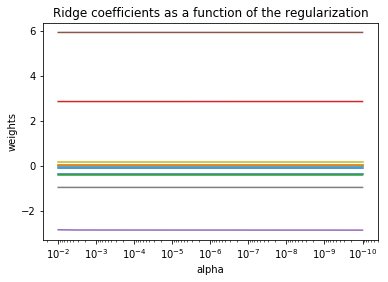

In [6]:
## Model output:
ax = plt.gca()

ax.plot(
    alphas, 
    coefs
);

ax.set_xscale("log");

ax.set_xlim(
    ax.get_xlim()[::-1] ## reverse axis
);

plt.xlabel("alpha");

plt.ylabel("weights");

plt.title("Ridge coefficients as a function of the regularization");

plt.axis("tight"); ## remove extra white space

plt.show();